# Jamboree Education - Linear Regression

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

**Problem Statment:**
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("jamboree_admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df = df.drop(['Serial No.'],axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values present in the dataset.

In [7]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


-  The mean GRE score is approximately 316.47, with a standard deviation of approximately 11.30. GRE scores range from a minimum of 290 to a maximum of 340.
- TOEFL scores range from a minimum of 92 to a maximum of 120, with most scores also concentrated around the middle.
-  University ratings are mostly distributed between 2 and 4.
- SOP and LOR scores have a similar distribution, with most scores around 3.0 to 4.0.
- CGPA is distributed between approximately 6.8 and 9.92, with a slight skew towards higher values.

## Univariate Analysis

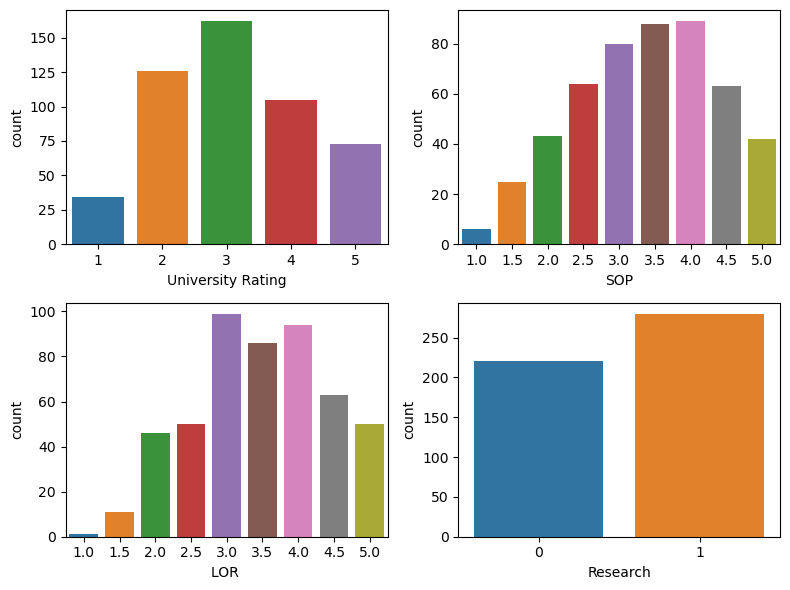

In [9]:
cat_cols = ['University Rating', 'SOP', 'LOR ', "Research"]
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axis array for ease of iteration
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x = col, data= df, ax=axs[i])
    
plt.tight_layout()
plt.show()

One can note that the predominant values for categorical features are as follows:

- University Rating: 3
- SOP (Statement of Purpose): 3.5 & 4
- LOR (Letter of Recommendation): 3
- Research: True

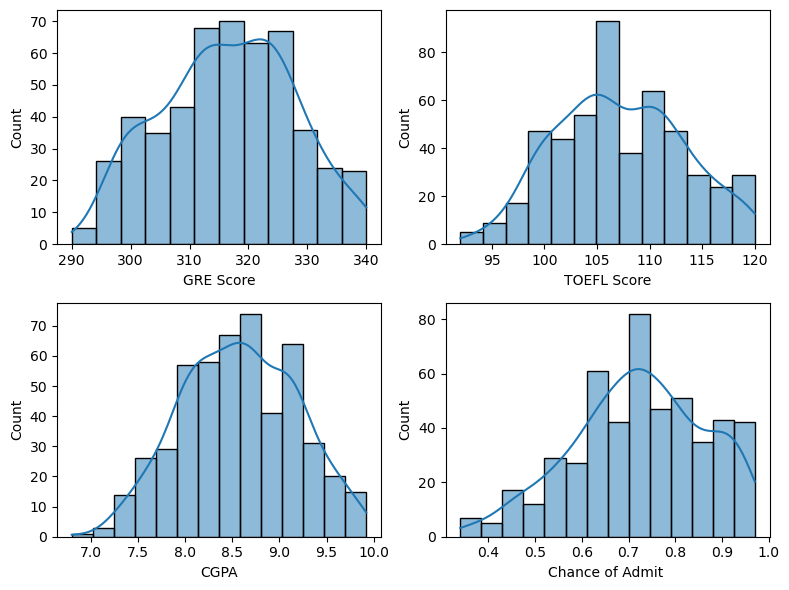

In [10]:
num_col = ["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axis array for ease of iteration
axs = axs.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], ax=axs[i], kde=True)
    
plt.tight_layout()
plt.show()

- The range of GRE scores spans from 290 to 340, with the majority of students scoring within the range of 310 to 330.
- TOEFL scores fall between 90 and 120, with a concentration of students achieving scores around 105.
- CGPA varies between 7 and 10, with the highest concentration of students scoring around 8.5.
- Chance of Admit represents a probability percentage ranging from 0 to 1, with a peak concentration of students achieving scores around 70% to 75%.

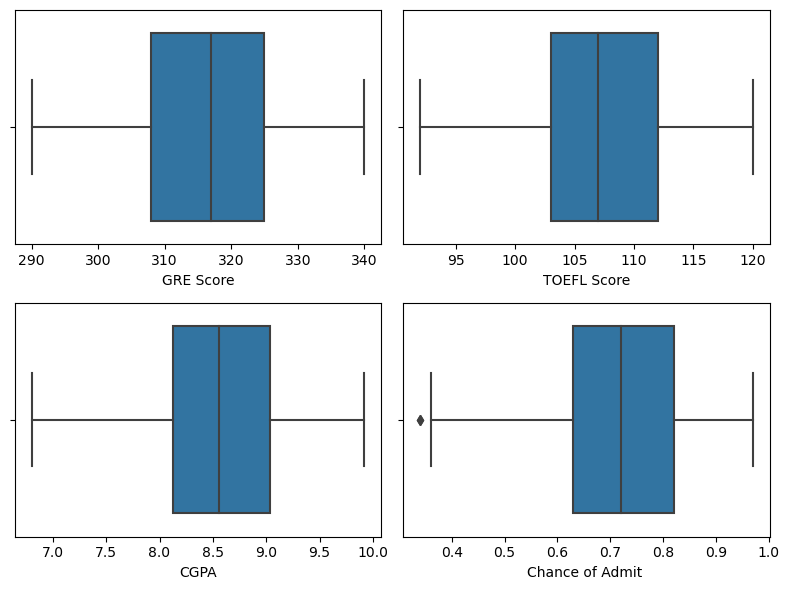

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axis array for ease of iteration
axs = axs.flatten()
for i, col in enumerate(num_col):
    sns.boxplot(x = df[col], ax = axs[i])
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

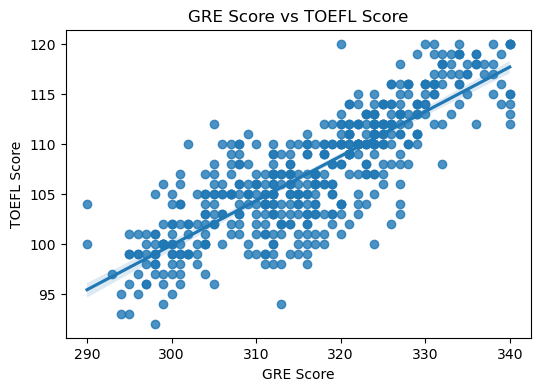

In [12]:
plt.figure(figsize=(6, 4))
sns.regplot(x="GRE Score",y="TOEFL Score",data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores

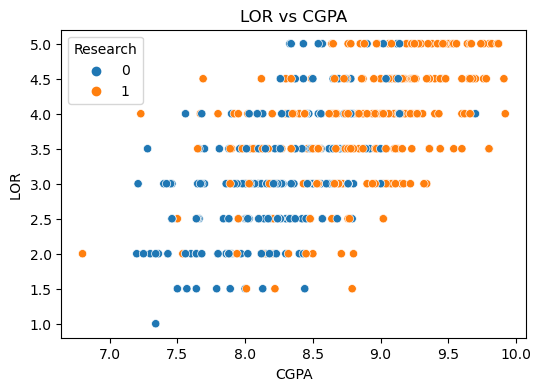

In [13]:
plt.figure(figsize=(6, 4))
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

 - have higher CGPA tend to receive higher ratings in their Letters of Recommendation, and vice versa.
A strong CGPA along with positive Letters of Recommendation could enhance an applicant's chances of admission.

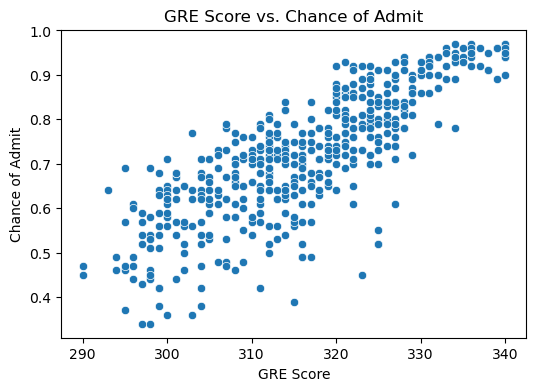

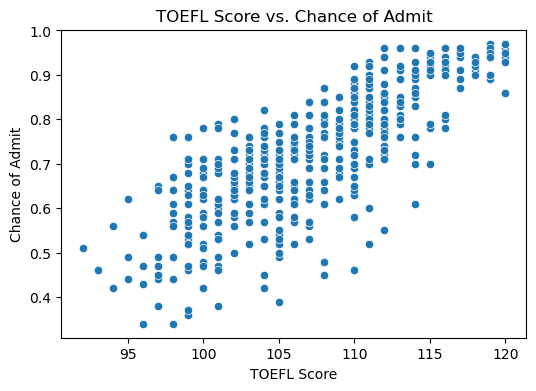

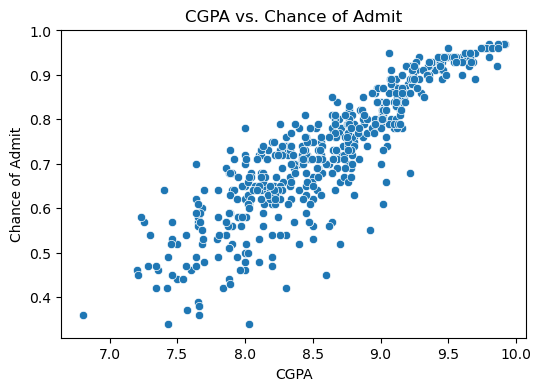

In [14]:
for col in num_col[:3]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y="Chance of Admit ", data=df)
    plt.title(f"{col} vs. Chance of Admit")
    plt.xlabel(col)
    plt.ylabel("Chance of Admit")
    plt.show()

Seems like there is a linear correlation between the continuous variables and the target variable.

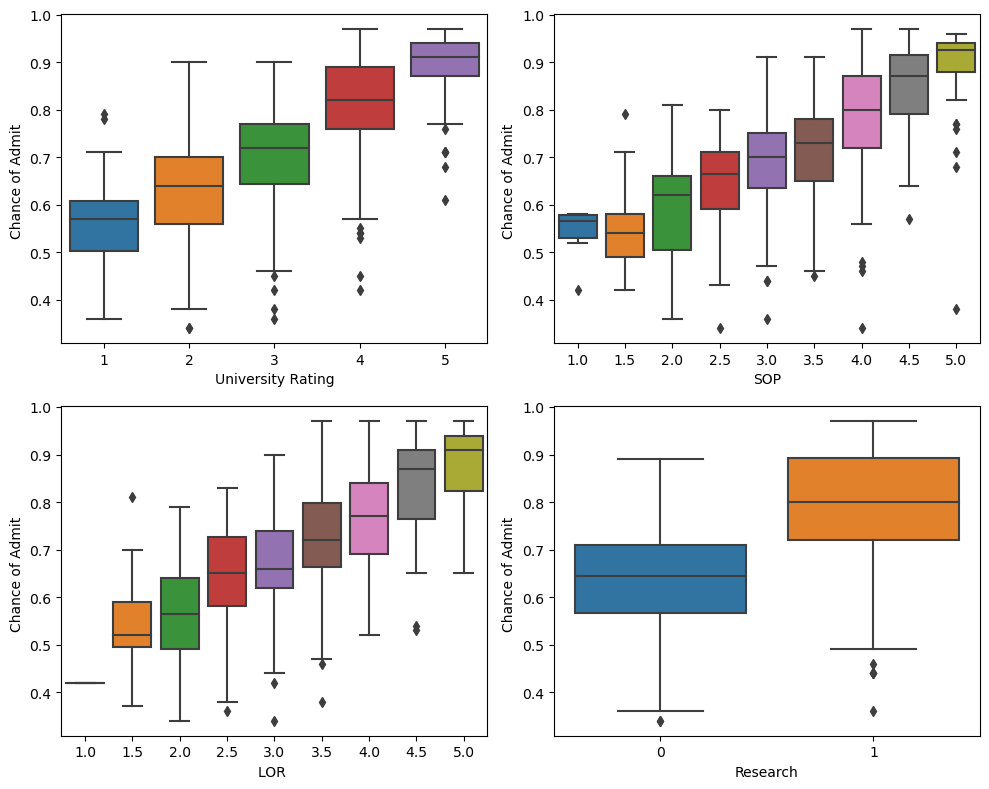

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axis array for ease of iteration
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x = col, y = "Chance of Admit ", data= df, ax=axs[i])
    
plt.tight_layout()
plt.show()

Higher university ranking, engagement in research, and the quality of Statement of Purpose (SOP) and Letter of Recommendation (LOR) are factors that positively influence admission likelihood.

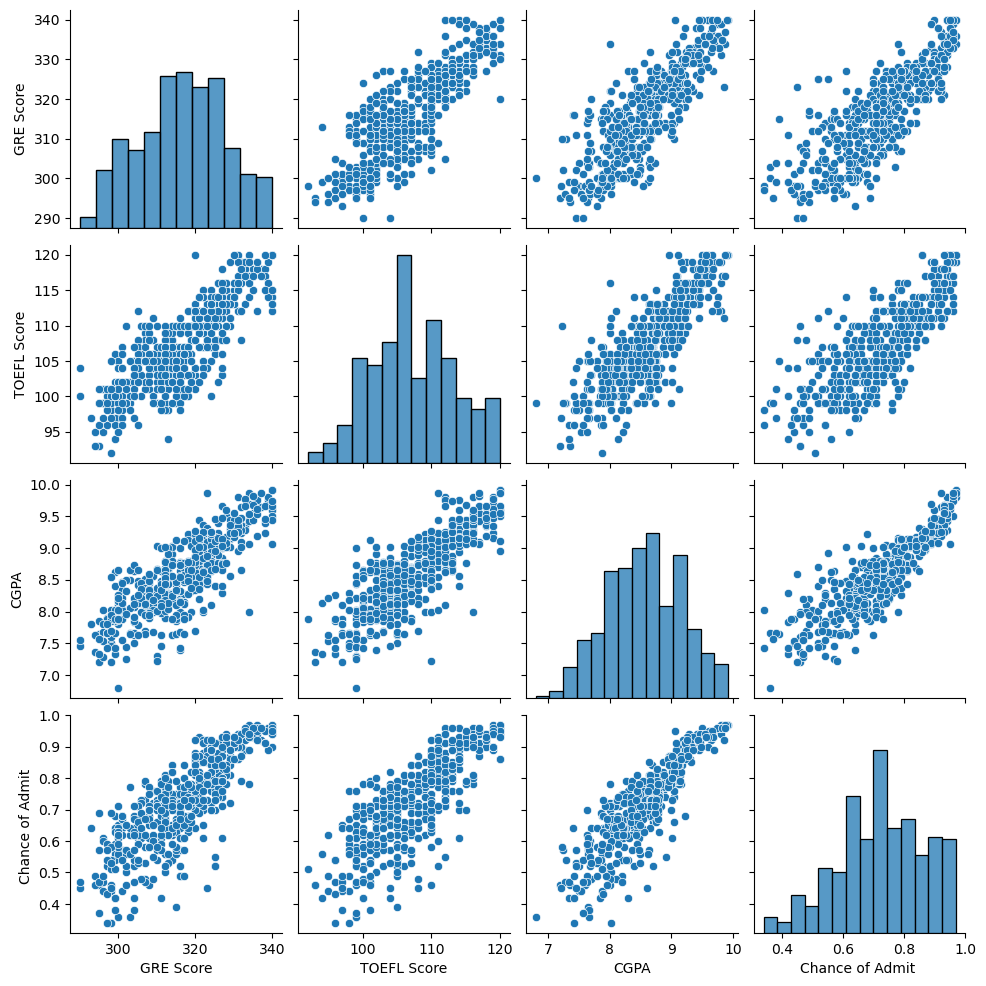

In [16]:
sns.pairplot(df[num_col])
plt.show()

## Correlation among variables

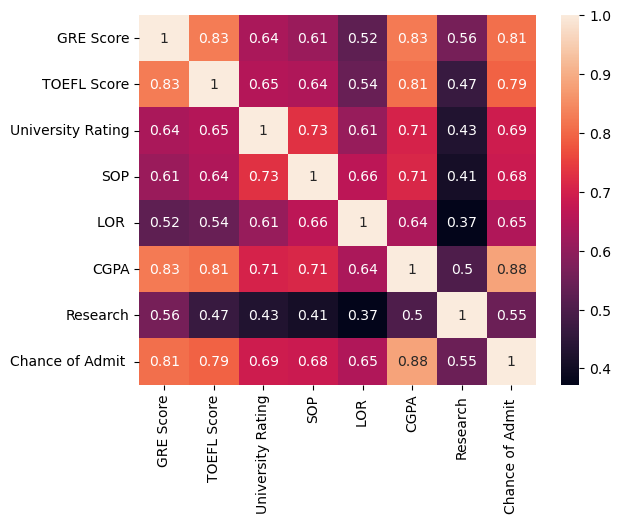

In [17]:
sns.heatmap(df.corr(), annot = True)
plt.show()

The correlation matrix indicates a robust positive correlation between examination scores (CGPA/GRE/TOEFL) and the likelihood of admission.

# Data Preprocessing

### Duplicate value check

In [18]:
duplicate = df.duplicated() 
duplicate.value_counts()

False    500
dtype: int64

From value count we can see that there are zero duplicate values in the data present.

### Outlier treatment

In [19]:
Q1=df['Chance of Admit '].quantile(0.25)
Q3=df['Chance of Admit '].quantile(0.75)
IQR=Q3-Q1
print("IQR =",IQR)
lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
print("Range = ",{lower_limit, Upper_limit})

outliers = df[(df['Chance of Admit '] < lower_limit) | (df['Chance of Admit '] > Upper_limit)]
num_outliers = outliers.shape[0]
print("Number of outliers:", num_outliers)

IQR = 0.18999999999999995
Range =  {0.3450000000000001, 1.105}
Number of outliers: 2


# Regression using Sklearn library

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(["Chance of Admit "], axis = 1)
y = df["Chance of Admit "]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [89]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
17,319,106,3,4.0,3.0,8.00,1
239,299,100,1,1.5,2.0,7.89,0
58,300,99,1,3.0,2.0,6.80,1
247,311,104,2,2.5,3.5,8.48,0
426,312,106,3,3.0,5.0,8.57,0
...,...,...,...,...,...,...,...
377,290,100,1,1.5,2.0,7.56,0
199,313,107,3,4.0,4.5,8.69,0
273,312,99,1,1.0,1.5,8.01,1
113,320,110,2,4.0,3.5,8.56,0


In [91]:
y_train

17     0.65
239    0.59
58     0.36
247    0.71
426    0.71
       ... 
377    0.47
199    0.72
273    0.52
113    0.72
221    0.75
Name: Chance of Admit , Length: 400, dtype: float64

#### STANDARD SCALER to scale the data

In [92]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled

array([[ 2.27792531e-01, -1.97586190e-01, -1.00599873e-01, ...,
        -5.37643473e-01, -9.65379012e-01,  8.72991717e-01],
       [-1.53292268e+00, -1.18141784e+00, -1.85016288e+00, ...,
        -1.61833387e+00, -1.14562461e+00, -1.14548624e+00],
       [-1.44488692e+00, -1.34538979e+00, -1.85016288e+00, ...,
        -1.61833387e+00, -2.93169458e+00,  8.72991717e-01],
       ...,
       [-3.88457794e-01, -1.34538979e+00, -1.85016288e+00, ...,
        -2.15867907e+00, -9.48993049e-01,  8.72991717e-01],
       [ 3.15828292e-01,  4.58301579e-01, -9.75381376e-01, ...,
         2.70172600e-03, -4.77650822e-02, -1.14548624e+00],
       [-3.63147513e-02,  4.58301579e-01, -1.00599873e-01, ...,
         5.43046925e-01, -4.77650822e-02, -1.14548624e+00]])

In [93]:
X_train1=pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_train1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.227793,-0.197586,-0.100600,0.632113,-0.537643,-0.965379,0.872992
1,-1.532923,-1.181418,-1.850163,-1.911603,-1.618334,-1.145625,-1.145486
2,-1.444887,-1.345390,-1.850163,-0.385373,-1.618334,-2.931695,0.872992
3,-0.476494,-0.525530,-0.975381,-0.894116,0.002702,-0.178853,-1.145486
4,-0.388458,-0.197586,-0.100600,-0.385373,1.623737,-0.031379,-1.145486
...,...,...,...,...,...,...,...
395,-2.325245,-1.181418,-1.850163,-1.911603,-1.618334,-1.686361,-1.145486
396,-0.300422,-0.033614,-0.100600,0.632113,1.083392,0.165252,-1.145486
397,-0.388458,-1.345390,-1.850163,-2.420346,-2.158679,-0.948993,0.872992
398,0.315828,0.458302,-0.975381,0.632113,0.002702,-0.047765,-1.145486


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
models = [
 ['Linear Regression :', LinearRegression()],

 ['Lasso Regression :', Lasso(alpha=0.1)], #try with differen
 ['Ridge Regression :', Ridge(alpha=1.0)] #try with different
 ]
print("Results without removing features with multicollinearity ...")
for name,model in models:
     model.fit(X_train1, y_train.values)
     predictions = model.predict(scaler.transform(X_test))
     print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.07142704183386395
Lasso Regression : 0.12942371769939057
Ridge Regression : 0.07145321120320089


In [95]:
for i, col in enumerate(X_train1.columns):
    print("Coefficient of {} is {}".format(col,model.coef_[i]))

Coefficient of GRE Score is 0.025967159564498153
Coefficient of TOEFL Score is 0.013767056471125949
Coefficient of University Rating is 0.009336334872037784
Coefficient of SOP is -0.0007829274954825708
Coefficient of LOR  is 0.01517713247540836
Coefficient of CGPA is 0.06819564224897016
Coefficient of Research is 0.012653827108763036


### Linear Regression using Statsmodel library 

In [96]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train1)
model = sm.OLS(y_train.values, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     285.8
Date:                Fri, 23 Feb 2024   Prob (F-statistic):          1.13e-149
Time:                        14:07:44   Log-Likelihood:                 583.09
No. Observations:                 400   AIC:                            -1150.
Df Residuals:                     392   BIC:                            -1118.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7246      0.00

In [97]:
X_train_new=X_sm.drop(columns='SOP')

In [98]:
sm_model = sm.OLS(y_train.values, X_train_new).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     334.2
Date:                Fri, 23 Feb 2024   Prob (F-statistic):          6.03e-151
Time:                        14:08:01   Log-Likelihood:                 583.07
No. Observations:                 400   AIC:                            -1152.
Df Residuals:                     393   BIC:                            -1124.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7246      0.00

One benefit of utilizing StatsModel is its direct provision of R-squared and adjusted R-squared values.

R-squared: 0.829

Adjusted R-squared: 0.826

# Testing the assumptions of the linear regression mode

### 1. Multicollinearity Check by VIF score

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t =  pd.DataFrame(X_train_new, columns = X_train_new.columns)
vif["features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"],  2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,CGPA,4.82
1,GRE Score,4.73
2,TOEFL Score,3.88
3,University Rating,2.26
4,LOR,1.82
6,Research,1.52
0,const,1.00


- The VIF values provided by the model are below 5, indicating **minimal multicollinearity.**

-  In this context, the linear regression model performs effectively, and there is no necessity to eliminate or discard any features.
- **VIF looks fine and hence, we can go ahead with the predictions.**

In [110]:
X_test_std= scaler.transform(X_test)
X_test1 = pd.DataFrame(X_test_std, columns=X_train.columns)
X_test1 = sm.add_constant(X_test1)

In [111]:
X_test_new=X_test1.drop(columns='SOP')

In [114]:
pred = sm_model.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred))
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred)))


Mean Absolute Error  0.04144722812636463
Root Mean Square Error  0.06023446523016607


### 2. Mean of residuals 

In [136]:
residuals = y_test.values - pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0007812645796671896


In [137]:
from scipy import stats
res = stats.shapiro(residuals)
res.statistic

0.9929826855659485

-  The closer the value is to 1, the more indicative it is of normality.

- In this instance, a value of 0.93 indicates a notably high level of normality within the error distribution.

- If the errors follow a Gaussian distribution, it confirms the assumption of error normality, serving as a validation check.

### 3. Linearity of variables (no pattern in the residual plot) 

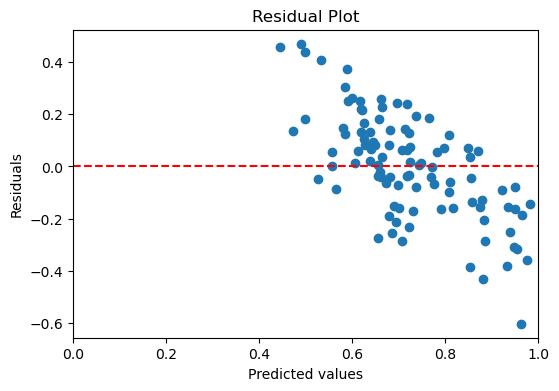

In [135]:
# Plot residuals against predicted values
plt.figure(figsize=(6, 4))
plt.scatter(x= pred, y = residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.xlim(0,1)
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--') 
plt.show()

### 4.  Test for Homoscedasticity 

In [128]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test1)
lzip(name, test)

[('F statistic', 0.65759884809964), ('p-value', 0.9107374130997219)]

- Here null hypothesis is - error terms are homoscedastic and since p-values >0.05,
- we fail to reject the null hypothesis

### 5. Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

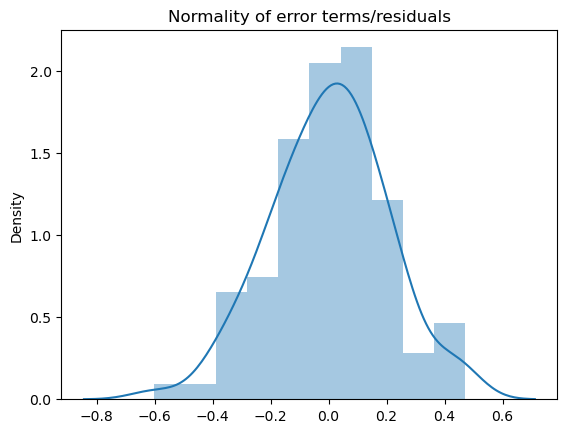

In [130]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

- Errors are normally distributed

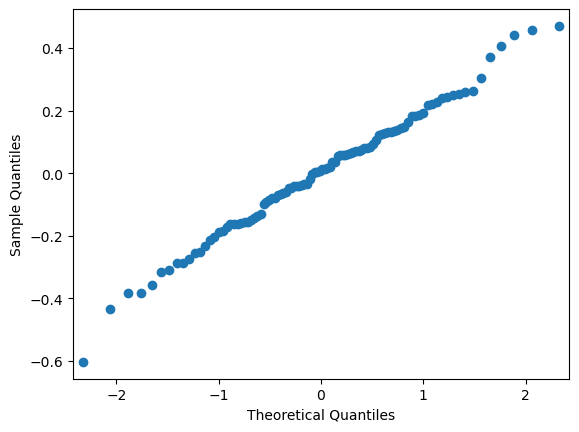

In [129]:
sm.qqplot(residuals)
plt.show()

## Ridge and Lasso regression

In [40]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
degree = 5
poly = PolynomialFeatures(degree = degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Standardize
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

#training model
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

output = model.predict(X_test_poly_scaled)

In [43]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_poly_scaled, y_train)

Ridge()

In [44]:
model_ridge.score(X_train_poly_scaled, y_train)

0.8438694607119062

In [55]:
Ridge_pred_test = model_ridge.predict(X_test_poly_scaled)
Ridge_pred_train = model_ridge.predict(X_train_poly_scaled)
print('MSE for train data:', mean_squared_error(y_train, Ridge_pred_train))
print('MSE for test data:', mean_squared_error(y_test, Ridge_pred_test))


MSE for train data: 0.034438407843400395
MSE for test data: 0.0348182588346684


In [53]:
model_lasso = Lasso(alpha=.1)
model_lasso.fit(X_train_poly_scaled, y_train)

Lasso(alpha=0.1)

In [54]:
lasso_pred_train = model_lasso.predict(X_train_poly_scaled)
Lasso_pred_test = model_lasso.predict(X_test_poly_scaled)
print('MSE for train data:', mean_squared_error(y_train, lasso_pred_train))
print('MSE for test data:', mean_squared_error(y_test, Lasso_pred_test))

MSE for train data: 0.019507234375
MSE for test data: 0.021375665624999998


In [48]:
model_lasso.score(X_train_poly_scaled, y_train)

0.8126524279653986

 MSE values have been reduced drastically by applying L1(Lasso) and L2(Ridge) regularization methods.

# Insights 

-  Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves.
-  the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.
- Students secring high CGPA have very high chance of admission.
- There were no significant amount of outliers found in the data.

# Recommendations

- The website has developed a linear regression model that allows students to assess their likelihood of admission to an Ivy League college. This model boasts an accuracy rate of 82% in predicting admission probabilities.
- Jamboree can get the list of student/learner who has less chance to admit and Jamboree can offer them coaching and help them to get into their dream universities.
- Students looking for Admission in the Ivy league colleges should aim for high TOEFL, GRE and CGPA.
-  A highly accurate admission prediction model can differentiate educational platforms and consulting services, attracting more users and establishing credibility within the industry.
-  Demographic information, extracurricular activities,  and standardized test scores. Access to a diverse range of data can provide a more comprehensive understanding of applicant profiles and improve the accuracy of admission predictions.